In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from time import sleep
from random import randint

In [79]:
def extract_content(all_div,team,output):

    for container in all_div:
        output['Team'].append(team.capitalize())
        
        name = container.a.find('p', class_='nba-player-index__name').text
        output['Name'].append(name)
        
        details = container.a.find('div', class_='nba-player-index__details').text
        position = re.match('[A-Za-z]+',details).group(0)
        output['Position'].append(position)
        
        numbers = re.findall('\d+', details)
        height_in_inches = (int(numbers[0]) * 12) + int(numbers[1])
        height = round(height_in_inches * 2.54)
        output['Height (cm)'].append(height)
        
        weight = round((int(numbers[2])/2.205),2)
        output['Weight (kg)'].append(weight)
        
        bmi = round((weight/(height/100)**2),2)
        output['BMI'].append(bmi)
        
        name_len = len(re.findall('[A-Za-z]',name))
        output['Length of Name'].append(name_len)
        
    return output

In [80]:
teams = [['atl','hawks'],
         ['bos','celtics'],
         ['bkn','nets'],
         ['cha','hornets'],
         ['chi','bulls'], 
         ['cle','cavaliers'],
         ['dal','mavericks'],
         ['den','nuggets'],
         ['det','pistons'],
         ['gsw','warriors'],
         ['hou','rockets'],
         ['ind','pacers'],
         ['lac','clippers'],
         ['lal','lakers'],
         ['mem','grizzlies'],
         ['mia','heat'],
         ['mil','bucks'],
         ['min','timberwolves'],
         ['nop','pelicans'],
         ['nyk','knicks'],
         ['okc','thunder'],
         ['orl','magic'],
         ['phi','sixers'],
         ['phx','suns'],
         ['por','blazers'],
         ['sac','kings'],
         ['sas','spurs'],
         ['tor','raptors'],
         ['uta','jazz'],
         ['was','wizards']]

#final output
output = {'Team': [], 'Name': [], 'Position': [], 'Height (cm)': [], 'Weight (kg)': [], 'BMI': [], 'Length of Name': []}

#create request object
for team in teams:
    url = "https://www.nba.com/teams/" + team[1]
    r = requests.get(url)

    #create soup object 
    soup = BeautifulSoup(r.text,'html.parser')
    
    #finding the right div container
    all_div = soup.find_all('section', class_='nba-player-index__trending-item small-4 medium-3 large-2 team-'+team[0]+'-'+team[1])

    #control crawler
    sleep(randint(2,10))
    
    #extract content and store into output
    results = extract_content(all_div,team[1],output)
    
#convert output into dataframe
results_df = pd.DataFrame(results)

In [5]:
#shows entire 'inspect' in a clean form
print(soup.prettify())

<!DOCTYPE html>
<html class="" dir="ltr" lang="en">
 <head>
  <link href="//fastlane.rubiconproject.com" rel="dns-prefetch"/>
  <link href="//optimized-by.rubiconproject.com" rel="dns-prefetch"/>
  <link href="//ads.rubiconproject.com" rel="dns-prefetch"/>
  <link href="//aax.amazon-adsystem.com" rel="dns-prefetch"/>
  <link href="//c.amazon-adsystem.com" rel="dns-prefetch"/>
  <link href="//rtax.criteo.com" rel="dns-prefetch"/>
  <meta charset="utf-8"/>
  <meta content="Washington Wizards Team Page | NBA.com" name="title" property="title"/>
  <link href="http://www.nba.com/teams/wizards" rel="canonical">
   <meta content="Drupal 8 (https://www.drupal.org)" name="Generator"/>
   <meta content="width" name="MobileOptimized"/>
   <meta content="true" name="HandheldFriendly"/>
   <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
   <meta content="width=device-width" name="viewport"/>
   <meta content="ie=edge, chrome=1" http-equiv="x-ua-compatible"/>
   <script type=

In [90]:
results_df.head()

,Team,Name,Position,Height (cm),Weight (kg),BMI,Length of Name
0,Hawks,DeAndre'Bembry,Guard,196,95.24,24.79,13
1,Hawks,CharlesBrown Jr.,Guard,198,90.25,23.02,14
2,Hawks,ClintCapela,Center,208,108.84,25.16,11
3,Hawks,VinceCarter,Guard,198,99.77,25.45,11
4,Hawks,JohnCollins,Forward,206,106.58,25.12,11


In [59]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_standings.html'
r = requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

output = {'Team': [], 'Record': [], 'Height (cm)': [], 'Weight (kg)': [], 'BMI': [], 'Length of Name': []}

all_div = soup.find_all('tr', class_='full_table')
for container in all_div:
    if len(output['Team']) < 30:
        team = container.th.a.text
        output['Team'].append(team)
        record = container.find('td', attrs={'data-stat': 'win_loss_pct'}).get_text()
        record_formatted = float('0' + record)
        output['Record'].append(record_formatted)
        
for height in results_df.groupby('Team')['Height (cm)'].mean():
    output['Height (cm)'].append(height)
    
for weight in results_df.groupby('Team')['Weight (kg)'].mean():
    output['Weight (kg)'].append(weight)

for bmi in results_df.groupby('Team')['BMI'].mean():
    output['BMI'].append(bmi)
    
for name_len in results_df.groupby('Team')['Length of Name'].mean():
    output['Length of Name'].append(name_len)
    
#convert output into dataframe
summary_df = pd.DataFrame(output)

In [60]:
summary_df.sort_values('Record', ascending=False)

,Team,Record,Height (cm),Weight (kg),BMI,Length of Name
0,Milwaukee Bucks,0.815,202.625000,102.239375,24.813750,11.937500
15,Los Angeles Lakers,0.778,200.176471,99.265882,24.706471,13.000000
1,Toronto Raptors,0.719,199.294118,102.147059,25.661176,13.058824
16,Los Angeles Clippers,0.688,199.882353,98.253529,24.542941,12.764706
2,Boston Celtics,0.672,201.058824,99.427647,24.551765,12.764706
17,Denver Nuggets,0.662,201.875000,101.473750,24.852500,10.875000
18,Utah Jazz,0.641,198.764706,96.411765,24.378824,11.705882
3,Miami Heat,0.631,197.823529,100.092353,25.483529,12.000000
20,Houston Rockets,0.625,198.117647,94.570588,24.095294,11.235294
19,Oklahoma City Thunder,0.625,197.352941,98.999412,25.368824,11.941176


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
summary_df.describe()

,Record,Height (cm),Weight (kg),BMI,Length of Name
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.500900,199.185507,98.708304,24.834270,12.087443
std,0.163432,1.391352,1.892527,0.462571,0.575784
min,0.231000,196.176471,94.570588,24.070000,10.875000
25%,0.359250,198.166360,97.628768,24.545147,11.732537
50%,0.465500,199.181985,98.603125,24.738529,12.121324
75%,0.629500,200.147978,99.919724,25.089706,12.522059
max,0.815000,202.625000,102.239375,26.048235,13.058824


In [73]:
summary_df.corr()

,Record,Height (cm),Weight (kg),BMI,Length of Name
Record,1.000000,0.324840,0.352007,0.108074,0.155867
Height (cm),0.324840,1.000000,0.382801,-0.378958,-0.164156
Weight (kg),0.352007,0.382801,1.000000,0.708813,0.203321
BMI,0.108074,-0.378958,0.708813,1.000000,0.328709
Length of Name,0.155867,-0.164156,0.203321,0.328709,1.000000


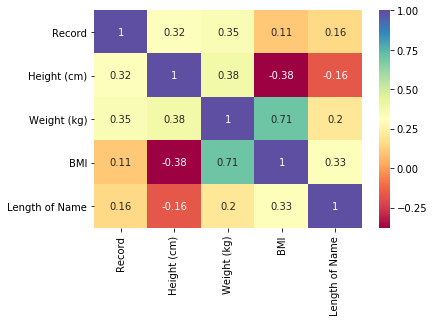

In [89]:
sns.heatmap(summary_df.corr(),annot=True, cmap='Spectral')

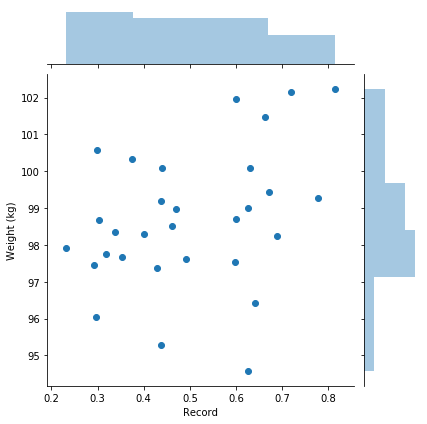

In [75]:
sns.jointplot(x = 'Record', y='Weight (kg)', data=summary_df)